# Bank Loan Term Prediction
---

## Import packages & read data.

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [2]:
df1 = pd.read_csv('credit_test.csv')
df2 = pd.read_csv('credit_train.csv')
df= pd.concat([df1,df2], axis=0, ignore_index=True)   # concat two dataset
df

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0,NaN
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0,NaN
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0,NaN
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0,NaN
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(110867, 19)

In [4]:
df.tail()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
110862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

Loan ID                           867
Customer ID                       867
Current Loan Amount               867
Term                              867
Credit Score                    22002
Annual Income                   22002
Years in current job             5516
Home Ownership                    867
Purpose                           867
Monthly Debt                      867
Years of Credit History           867
Months since last delinquent    59314
Number of Open Accounts           867
Number of Credit Problems         867
Current Credit Balance            867
Maximum Open Credit               869
Bankruptcies                     1093
Tax Liens                         878
Loan Status                     10867
dtype: int64

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110867 entries, 0 to 110866
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       110000 non-null  object 
 1   Customer ID                   110000 non-null  object 
 2   Current Loan Amount           110000 non-null  float64
 3   Term                          110000 non-null  object 
 4   Credit Score                  88865 non-null   float64
 5   Annual Income                 88865 non-null   float64
 6   Years in current job          105351 non-null  object 
 7   Home Ownership                110000 non-null  object 
 8   Purpose                       110000 non-null  object 
 9   Monthly Debt                  110000 non-null  float64
 10  Years of Credit History       110000 non-null  float64
 11  Months since last delinquent  51553 non-null   float64
 12  Number of Open Accounts       110000 non-nul

In [7]:
duplicate = df.duplicated()
print(f'Duplicate in df :', duplicate.sum())

Duplicate in df : 11081


**Rename columns for easer code writing**

In [8]:
df.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Loan Status'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace(' ','_')

In [10]:
df.columns

Index(['Loan_ID', 'Customer_ID', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens', 'Loan_Status'],
      dtype='object')

In [84]:
df[df.Loan_ID.duplicated()]

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df = df.dropna(subset = ['Loan_ID'])

In [86]:
df[df.Loan_ID.duplicated()]

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
10443,374bba0a-c0fe-46bf-a93f-b7aa70333d92,64f770d8-dec2-42e7-8955-6149ce7efd5f,479358.0,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,22659.59,22.4,41.0,13.0,0.0,807462.0,1391302.0,0.0,0.0,Fully Paid
10461,206c7b26-db44-4c00-a637-3fcb931b3138,8823b7a8-9c0b-4f2d-a1dc-ffcb37ee4efb,311872.0,Long Term,680.0,1063810.0,6 years,Home Mortgage,Debt Consolidation,28191.06,12.2,NaN,10.0,0.0,391723.0,591338.0,0.0,0.0,Fully Paid
10521,8d6b94ba-d605-4336-b8af-773d83fac618,50b9be84-4a19-4005-b50a-016352734f4d,314226.0,Long Term,723.0,2638454.0,1 year,Home Mortgage,other,34959.43,18.2,54.0,10.0,0.0,662815.0,969034.0,0.0,0.0,Fully Paid
10528,ad5e29dd-d26e-43cc-b179-4a73451322f4,1eefc01a-2551-44c9-8305-0fd083e770ac,405856.0,Long Term,708.0,1155751.0,10+ years,Rent,Debt Consolidation,32264.85,22.7,NaN,13.0,0.0,338181.0,594198.0,0.0,0.0,Fully Paid
10570,75ef09fa-fb1d-4ab6-bf18-382007ca1326,3ee8dea0-7560-4a54-8cf2-18a196f68618,149116.0,Short Term,700.0,1380160.0,7 years,Home Mortgage,Home Improvements,18171.98,10.8,NaN,5.0,0.0,95171.0,112574.0,0.0,0.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110344,326d0f2b-015f-480e-90e9-9c0d7d307196,ed9a397b-8a72-45c2-92de-b91f990a623d,244266.0,Short Term,714.0,1619047.0,10+ years,Rent,Debt Consolidation,4290.39,21.4,NaN,5.0,1.0,132012.0,242660.0,1.0,0.0,Fully Paid
110345,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,48796.0,Short Term,NaN,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.3,NaN,9.0,0.0,87875.0,239404.0,0.0,0.0,Fully Paid
110346,79b81158-5d55-4766-8ad6-ebcd683f7d59,e45e8dc4-05ad-4efe-92cc-784a6d5ef61a,44484.0,Short Term,717.0,1152426.0,10+ years,Home Mortgage,small_business,6280.64,21.0,12.0,6.0,0.0,961932.0,0.0,0.0,0.0,Fully Paid
110347,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0,Fully Paid


In [87]:
df[df['Loan_ID'] == 'a2598c9b-5c6d-42e5-a08c-84d60101126c']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
2682,a2598c9b-5c6d-42e5-a08c-84d60101126c,7f652fdd-6b61-4547-8896-f0c72e613b88,222200.0,Short Term,NaN,NaN,7 years,Own Home,Debt Consolidation,4010.71,16.2,NaN,8.0,0.0,181469.0,344454.0,0.0,0.0,NaN
21592,a2598c9b-5c6d-42e5-a08c-84d60101126c,7f652fdd-6b61-4547-8896-f0c72e613b88,222200.0,Short Term,720.0,767600.0,7 years,Own Home,Debt Consolidation,4010.71,16.2,NaN,8.0,0.0,181469.0,344454.0,0.0,0.0,Fully Paid


## Split the data for train, validation and test

In [11]:
# split the data for train and test
df_Train, df_test = train_test_split(df, test_size = 0.2, random_state = 30 )

# split the train for train and val
df_train, df_val = train_test_split(df_Train, test_size = 0.2, random_state = 30 )

In [12]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (70954, 19)
Shape of validation: (17739, 19)
Shape of test: (22174, 19)


## Data Pre-processing

### Cleaning data

In [13]:
# reset index for train
df_train = df_train.reset_index(drop=True)

# reset index for val
df_val = df_val.reset_index(drop=True)

# reset index for val
df_test = df_test.reset_index(drop=True)

In [14]:
# dope nulls in Loan_ID

# for train
df_train = df_train.dropna(subset = ['Loan_ID'])

# for val
df_val = df_val.dropna(subset = ['Loan_ID'])

# for test
df_test = df_test.dropna(subset = ['Loan_ID'])

In [15]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (70385, 19)
Shape of validation: (17598, 19)
Shape of test: (22017, 19)


In [16]:
df_train.sample(20)

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
42571,14061d84-3003-4f23-8a00-b5ef7099b917,b353a179-32ea-4337-aa7d-1b8905ba7438,242022.0,Long Term,713.0,1306326.0,10+ years,Home Mortgage,Debt Consolidation,24820.27,23.1,16.0,13.0,0.0,683088.0,1074678.0,0.0,0.0,Fully Paid
39100,2b2387d3-470c-41df-af96-d4ef2b5c3315,20bf3c2e-2826-4cd1-a11d-f576aa8607dd,99999999.0,Long Term,694.0,1942940.0,10+ years,Home Mortgage,Debt Consolidation,13633.07,26.5,NaN,6.0,0.0,266836.0,303798.0,0.0,0.0,Fully Paid
16764,9e3833db-51f5-43ce-9823-5fd8d522f73a,39a8f90a-5a81-4988-9c17-b0dd39efe8be,324038.0,Short Term,7410.0,708928.0,3 years,Rent,Debt Consolidation,17664.11,17.0,74.0,7.0,0.0,186599.0,319616.0,0.0,0.0,NaN
997,5c32f8ff-369b-438c-a234-b29696a55637,fe03ce01-a14e-4441-83a2-7b9d0a4fa369,99999999.0,Short Term,725.0,1770705.0,10+ years,Rent,Debt Consolidation,31725.06,13.0,NaN,31.0,0.0,550601.0,1250062.0,0.0,0.0,Fully Paid
39005,9e42ecea-9e7f-4cb5-861f-565faa1ef829,2664549d-34d1-409d-9cf2-cf55f4e5c918,319176.0,Short Term,677.0,1205683.0,6 years,Own Home,Buy House,10650.26,12.9,54.0,8.0,0.0,51737.0,159720.0,0.0,0.0,Fully Paid
34264,8051ffbc-e94e-43b0-99ca-23497f643c96,05d2bc31-e42e-4218-b7c6-ae0094658399,99999999.0,Short Term,725.0,743964.0,3 years,Rent,Debt Consolidation,4761.40,6.3,NaN,3.0,0.0,196479.0,312070.0,0.0,0.0,Fully Paid
19916,46a02373-0846-430b-841e-5b19e45c4d17,636c97a3-16a1-4ade-bc2e-cc9edd21ac00,553630.0,Long Term,701.0,1549165.0,< 1 year,Rent,Debt Consolidation,27174.94,18.6,NaN,18.0,0.0,478135.0,1091970.0,0.0,0.0,Fully Paid
32513,e9ce3333-7ed5-4b84-b44b-d33515af6d02,2e0e7b02-fcca-4050-b79c-81eb5554d77f,267212.0,Short Term,719.0,1442385.0,9 years,Home Mortgage,Debt Consolidation,10072.66,15.9,18.0,5.0,0.0,319276.0,407572.0,0.0,0.0,Fully Paid
50846,5cb07c1e-c825-45c7-80a1-d35a9f96b9e8,ce7585bc-7919-4639-a171-5018cd3563ff,331188.0,Short Term,746.0,1144104.0,NaN,Home Mortgage,Debt Consolidation,5453.57,12.5,63.0,3.0,0.0,10412.0,132484.0,0.0,0.0,Fully Paid
54027,aecf5c2e-6b25-468d-8d25-e0f3ecfef911,052fcf27-21c7-498d-b612-2b5fea7719f4,175032.0,Short Term,750.0,1453500.0,3 years,Rent,Debt Consolidation,25194.00,15.6,56.0,21.0,0.0,143944.0,730994.0,0.0,0.0,Charged Off


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70385 entries, 0 to 70953
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       70385 non-null  object 
 1   Customer_ID                   70385 non-null  object 
 2   Current_Loan_Amount           70385 non-null  float64
 3   Term                          70385 non-null  object 
 4   Credit_Score                  56818 non-null  float64
 5   Annual_Income                 56818 non-null  float64
 6   Years_in_current_job          67391 non-null  object 
 7   Home_Ownership                70385 non-null  object 
 8   Purpose                       70385 non-null  object 
 9   Monthly_Debt                  70385 non-null  float64
 10  Years_of_Credit_History       70385 non-null  float64
 11  Months_since_last_delinquent  32820 non-null  float64
 12  Number_of_Open_Accounts       70385 non-null  float64
 13  N

In [18]:
df_train.isna().sum()

Loan_ID                             0
Customer_ID                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    13567
Annual_Income                   13567
Years_in_current_job             2994
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    37565
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 2
Bankruptcies                      145
Tax_Liens                           6
Loan_Status                      6383
dtype: int64

In [19]:
# check for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# for val
duplicate = df_val.duplicated()
print(f'Duplicate in validation :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())

Duplicate in train : 4090
Duplicate in validation : 262
Duplicate in test : 403


In [20]:
#df_train
df_train.Purpose.unique()
#df_val
df_val.Purpose.unique()
#da_test
df_test.Purpose.unique()

array(['Debt Consolidation', 'Other', 'Buy a Car', 'Home Improvements',
       'other', 'Business Loan', 'Take a Trip', 'Buy House',
       'Medical Bills', 'major_purchase', 'small_business', 'moving',
       'wedding', 'vacation', 'Educational Expenses', 'renewable_energy'],
      dtype=object)

In [21]:
df_train.Purpose.value_counts()

Debt Consolidation      55372
other                    4211
Home Improvements        4085
Other                    2265
Business Loan            1079
Buy a Car                 891
Medical Bills             807
Buy House                 474
Take a Trip               400
major_purchase            242
small_business            220
moving                     99
wedding                    85
Educational Expenses       76
vacation                   70
renewable_energy            9
Name: Purpose, dtype: int64

In [22]:
#df_train
df_train.Purpose = df_train.Purpose.str.replace('other','Other')
#df_val
df_val.Purpose = df_val.Purpose.str.replace('other','Other')
#df_test
df_test.Purpose = df_test.Purpose.str.replace('other','Other')

In [23]:
df_train.Purpose.value_counts()

Debt Consolidation      55372
Other                    6476
Home Improvements        4085
Business Loan            1079
Buy a Car                 891
Medical Bills             807
Buy House                 474
Take a Trip               400
major_purchase            242
small_business            220
moving                     99
wedding                    85
Educational Expenses       76
vacation                   70
renewable_energy            9
Name: Purpose, dtype: int64

In [24]:
df_train.Purpose.unique()

array(['Debt Consolidation', 'Other', 'Home Improvements', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Business Loan', 'Buy House',
       'major_purchase', 'Educational Expenses', 'small_business',
       'vacation', 'wedding', 'moving', 'renewable_energy'], dtype=object)

In [25]:
print(f'The duplicate in Loan ID in train:',df_train.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_train.Customer_ID.duplicated().sum())
print(f'The duplicate in Loan ID in val:',df_val.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in val:',df_val.Customer_ID.duplicated().sum())
print(f'The duplicate in Loan ID in test:',df_test.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in test:',df_test.Customer_ID.duplicated().sum())

The duplicate in Loan ID in train: 8765
The duplicate in Customer ID in train: 8765
The duplicate in Loan ID in val: 565
The duplicate in Customer ID in val: 565
The duplicate in Loan ID in test: 845
The duplicate in Customer ID in test: 845


In [26]:
df_train['Loan_ID'].value_counts().sort_values(ascending=False)

fdccc570-1de7-42a6-96f9-cb254f8d4032    2
43f127d4-1aba-4416-bb80-e5b10def6c79    2
789564af-7458-4182-af46-078ce4bfe193    2
50258edf-38dd-4924-9f5d-8e1101513f0f    2
5739e8e8-74a6-4e02-a4bd-45158bab2c05    2
                                       ..
e3532447-6279-48d7-8bec-4f91b73c2154    1
9995230c-514a-4981-abc8-3921c554b86a    1
24e41c5a-5d52-446b-bee5-382b6ffed333    1
5950667e-4534-4a33-8ed0-dc533710c8f4    1
424b5f80-06d9-4f30-8f3e-41954ca62449    1
Name: Loan_ID, Length: 61620, dtype: int64

In [27]:
df_train[df_train.Loan_ID.duplicated()]

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
410,8ae79efa-22b7-40cc-9246-bf040b96eb45,f1ba7e68-6493-44eb-aa60-a3d789062c66,263780.0,Long Term,720.0,2335138.0,10+ years,Home Mortgage,Debt Consolidation,39307.96,20.5,9.0,22.0,0.0,739062.0,1460338.0,0.0,0.0,Fully Paid
1006,c92cc2b8-5fa9-4eae-ad3c-a25eda5ebf71,442aea1d-7cb1-43a0-8227-5b6374f6158d,544016.0,Long Term,707.0,2067219.0,5 years,Home Mortgage,Debt Consolidation,15848.66,17.8,54.0,13.0,0.0,272118.0,561660.0,0.0,0.0,Fully Paid
1439,b4db2353-4a21-4be7-9e1d-ec5330604267,0847fc88-cf61-4105-94a5-b61cd787801a,129448.0,Short Term,709.0,801230.0,< 1 year,Rent,Medical Bills,11617.93,8.7,47.0,12.0,0.0,92834.0,291280.0,0.0,0.0,Fully Paid
1682,5fa2e5c1-e9aa-4a27-8859-bc1b408ea058,2f7f00b0-3934-4d50-89f1-c752967d5bbc,215776.0,Long Term,723.0,1174010.0,10+ years,Home Mortgage,Debt Consolidation,20740.97,24.5,37.0,10.0,0.0,369740.0,606386.0,0.0,0.0,Fully Paid
1765,e8107bb2-253a-4efe-bb9d-d1706a0eba2f,945297c2-f802-49a1-bf36-d14ba5470835,780472.0,Short Term,NaN,NaN,10+ years,Own Home,Debt Consolidation,54570.85,24.3,16.0,8.0,0.0,574978.0,816882.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70928,74ae0921-87d9-4b86-88ab-d69889cab050,7ab40a1d-f0e9-429a-97fa-dedf3879afd4,99999999.0,Long Term,721.0,1436134.0,10+ years,Home Mortgage,Debt Consolidation,16754.96,22.0,47.0,10.0,2.0,161690.0,306944.0,0.0,0.0,Fully Paid
70931,f7409cb7-9f21-4aca-9379-fd180c485ea4,b0b929e2-3ae2-4729-b306-146364476c4b,351010.0,Long Term,718.0,2084148.0,< 1 year,Own Home,Debt Consolidation,20494.16,8.5,NaN,6.0,0.0,287470.0,401522.0,0.0,0.0,Fully Paid
70932,19da6217-2c69-4fa8-adfd-dfc4822e2207,44cdb2f1-2138-404e-bdd3-c6a354cd846a,769780.0,Long Term,632.0,5698290.0,10+ years,Home Mortgage,Debt Consolidation,52709.23,12.0,NaN,7.0,0.0,187549.0,220022.0,0.0,0.0,Fully Paid
70942,91dcbb3a-bfda-459a-8284-386a9b539065,67dc8473-b3da-4582-8249-411d2d2bf95f,87846.0,Short Term,723.0,3170701.0,1 year,Rent,Debt Consolidation,24731.54,9.9,NaN,14.0,1.0,269857.0,762124.0,0.0,0.0,Fully Paid


In [28]:
df_train[df_train['Loan_ID'] == '96221533-e640-4d07-8967-159ee2d4e2bc']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
29,96221533-e640-4d07-8967-159ee2d4e2bc,6b16e5ef-88be-46ac-b9ed-f53c59cb50e9,133474.0,Short Term,725.0,671783.0,6 years,Own Home,Debt Consolidation,10860.4,10.9,9.0,9.0,0.0,62890.0,131186.0,0.0,0.0,NaN
4981,96221533-e640-4d07-8967-159ee2d4e2bc,6b16e5ef-88be-46ac-b9ed-f53c59cb50e9,99999999.0,Short Term,725.0,671783.0,6 years,Own Home,Debt Consolidation,10860.4,10.9,9.0,9.0,0.0,62890.0,131186.0,0.0,0.0,Fully Paid


In [29]:
df_train[df_train['Loan_ID'] == '74ae0921-87d9-4b86-88ab-d69889cab050']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
5227,74ae0921-87d9-4b86-88ab-d69889cab050,7ab40a1d-f0e9-429a-97fa-dedf3879afd4,429132.0,Long Term,721.0,1436134.0,10+ years,Home Mortgage,Debt Consolidation,16754.96,22.0,47.0,10.0,2.0,161690.0,306944.0,0.0,0.0,Fully Paid
70928,74ae0921-87d9-4b86-88ab-d69889cab050,7ab40a1d-f0e9-429a-97fa-dedf3879afd4,99999999.0,Long Term,721.0,1436134.0,10+ years,Home Mortgage,Debt Consolidation,16754.96,22.0,47.0,10.0,2.0,161690.0,306944.0,0.0,0.0,Fully Paid


**The repetition becouse the loan status has been changed from charged off to fully paid. and the current loan amount got some errors**

In [30]:
df_train[(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
4445,5e6034a5-3034-413f-8fbe-106ee8b379bf,62550808-4d89-4058-9a93-b8dec2606e71,99999999.0,Short Term,716.0,1091854.0,10+ years,Home Mortgage,Home Improvements,11009.55,14.3,7.0,7.0,0.0,87438.0,188540.0,0.0,0.0,Fully Paid
4981,96221533-e640-4d07-8967-159ee2d4e2bc,6b16e5ef-88be-46ac-b9ed-f53c59cb50e9,99999999.0,Short Term,725.0,671783.0,6 years,Own Home,Debt Consolidation,10860.40,10.9,9.0,9.0,0.0,62890.0,131186.0,0.0,0.0,Fully Paid
4994,e9334154-d374-494c-9042-f6ab1c6e8964,60b7aa4a-264a-4b8b-9ada-840d03d1ed37,99999999.0,Long Term,699.0,1999940.0,5 years,Rent,Debt Consolidation,21949.37,17.7,NaN,7.0,0.0,328472.0,410740.0,0.0,0.0,Fully Paid
5670,37838484-6d4e-457d-b8fe-bfa9656a62d3,38d88e4e-fe9a-4cc1-98db-1a2c1db6d164,99999999.0,Short Term,696.0,858762.0,8 years,Home Mortgage,Debt Consolidation,9303.35,14.4,46.0,8.0,0.0,152038.0,283030.0,0.0,0.0,Fully Paid
6028,01734323-d0bf-4008-9267-09af7a2aacdf,3a5a2ab6-778f-451a-96d2-dded59ff48aa,99999999.0,Short Term,707.0,869193.0,10+ years,Rent,Debt Consolidation,14993.66,16.0,NaN,7.0,0.0,236018.0,315194.0,0.0,0.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70812,1375a0d2-d93e-483a-9b76-e00973cce438,65984ea8-a76e-4a94-87ba-27df2730e24c,99999999.0,Short Term,714.0,2042956.0,< 1 year,Rent,Debt Consolidation,28260.98,17.9,NaN,8.0,0.0,180063.0,238832.0,0.0,0.0,Fully Paid
70818,6f135966-e498-4b16-9fde-5292c1f75832,7c1c0838-3f37-4f26-ba57-347295aa1ce6,99999999.0,Short Term,721.0,947530.0,6 years,Home Mortgage,Other,9554.34,10.5,5.0,11.0,0.0,169176.0,375276.0,0.0,0.0,Fully Paid
70855,e2e55321-229a-45d7-8625-1b4eea9b14c7,11907c50-311b-42de-b836-7a458c61bbe9,99999999.0,Short Term,702.0,1359127.0,2 years,Rent,Other,18348.11,16.5,18.0,15.0,0.0,154470.0,715396.0,0.0,0.0,Fully Paid
70903,312f4bfa-ec4d-4ca6-8442-061843479ee4,45a3403d-d80d-4d51-b8ac-f13cfc8da42e,99999999.0,Short Term,712.0,861859.0,10+ years,Own Home,Debt Consolidation,7160.53,19.6,NaN,7.0,0.0,253213.0,319044.0,0.0,0.0,Fully Paid


In [31]:
df_train[df_train['Loan_ID'] == '312f4bfa-ec4d-4ca6-8442-061843479ee4']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
5798,312f4bfa-ec4d-4ca6-8442-061843479ee4,45a3403d-d80d-4d51-b8ac-f13cfc8da42e,336270.0,Short Term,712.0,861859.0,10+ years,Own Home,Debt Consolidation,7160.53,19.6,NaN,7.0,0.0,253213.0,319044.0,0.0,0.0,Fully Paid
70903,312f4bfa-ec4d-4ca6-8442-061843479ee4,45a3403d-d80d-4d51-b8ac-f13cfc8da42e,99999999.0,Short Term,712.0,861859.0,10+ years,Own Home,Debt Consolidation,7160.53,19.6,NaN,7.0,0.0,253213.0,319044.0,0.0,0.0,Fully Paid


In [32]:
# drop duplicate in Loan_ID and Current_Loan_Amount = 99999999.0

# for train
df_train = df_train[~(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

# for val
df_val = df_val[~(df_val.Loan_ID.duplicated() & (df_val['Current_Loan_Amount'] == 99999999.0))]

# for test
df_test = df_test[~(df_test.Loan_ID.duplicated() & (df_test['Current_Loan_Amount'] == 99999999.0))]

In [33]:
df_train[(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status


In [34]:
print(f'The duplicate in Loan ID in train:',df_train.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_train.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in val:',df_val.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in val:',df_val.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in test:',df_test.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in test:',df_test.Customer_ID.duplicated().sum())

The duplicate in Loan ID in train: 7888
The duplicate in Customer ID in train: 7888
The duplicate in Loan ID in val: 516
The duplicate in Customer ID in val: 516
The duplicate in Loan ID in test: 768
The duplicate in Customer ID in test: 768


In [35]:
df_train[df_train.Loan_ID.duplicated()]

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
410,8ae79efa-22b7-40cc-9246-bf040b96eb45,f1ba7e68-6493-44eb-aa60-a3d789062c66,263780.0,Long Term,720.0,2335138.0,10+ years,Home Mortgage,Debt Consolidation,39307.96,20.5,9.0,22.0,0.0,739062.0,1460338.0,0.0,0.0,Fully Paid
1006,c92cc2b8-5fa9-4eae-ad3c-a25eda5ebf71,442aea1d-7cb1-43a0-8227-5b6374f6158d,544016.0,Long Term,707.0,2067219.0,5 years,Home Mortgage,Debt Consolidation,15848.66,17.8,54.0,13.0,0.0,272118.0,561660.0,0.0,0.0,Fully Paid
1439,b4db2353-4a21-4be7-9e1d-ec5330604267,0847fc88-cf61-4105-94a5-b61cd787801a,129448.0,Short Term,709.0,801230.0,< 1 year,Rent,Medical Bills,11617.93,8.7,47.0,12.0,0.0,92834.0,291280.0,0.0,0.0,Fully Paid
1682,5fa2e5c1-e9aa-4a27-8859-bc1b408ea058,2f7f00b0-3934-4d50-89f1-c752967d5bbc,215776.0,Long Term,723.0,1174010.0,10+ years,Home Mortgage,Debt Consolidation,20740.97,24.5,37.0,10.0,0.0,369740.0,606386.0,0.0,0.0,Fully Paid
1765,e8107bb2-253a-4efe-bb9d-d1706a0eba2f,945297c2-f802-49a1-bf36-d14ba5470835,780472.0,Short Term,NaN,NaN,10+ years,Own Home,Debt Consolidation,54570.85,24.3,16.0,8.0,0.0,574978.0,816882.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70926,a2598c9b-5c6d-42e5-a08c-84d60101126c,7f652fdd-6b61-4547-8896-f0c72e613b88,222200.0,Short Term,720.0,767600.0,7 years,Own Home,Debt Consolidation,4010.71,16.2,NaN,8.0,0.0,181469.0,344454.0,0.0,0.0,Fully Paid
70931,f7409cb7-9f21-4aca-9379-fd180c485ea4,b0b929e2-3ae2-4729-b306-146364476c4b,351010.0,Long Term,718.0,2084148.0,< 1 year,Own Home,Debt Consolidation,20494.16,8.5,NaN,6.0,0.0,287470.0,401522.0,0.0,0.0,Fully Paid
70932,19da6217-2c69-4fa8-adfd-dfc4822e2207,44cdb2f1-2138-404e-bdd3-c6a354cd846a,769780.0,Long Term,632.0,5698290.0,10+ years,Home Mortgage,Debt Consolidation,52709.23,12.0,NaN,7.0,0.0,187549.0,220022.0,0.0,0.0,Fully Paid
70942,91dcbb3a-bfda-459a-8284-386a9b539065,67dc8473-b3da-4582-8249-411d2d2bf95f,87846.0,Short Term,723.0,3170701.0,1 year,Rent,Debt Consolidation,24731.54,9.9,NaN,14.0,1.0,269857.0,762124.0,0.0,0.0,Fully Paid


In [36]:
df_train[df_train['Loan_ID'] == 'e8107bb2-253a-4efe-bb9d-d1706a0eba2f']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
206,e8107bb2-253a-4efe-bb9d-d1706a0eba2f,945297c2-f802-49a1-bf36-d14ba5470835,780472.0,Short Term,688.0,1943168.0,10+ years,Own Home,Debt Consolidation,54570.85,24.3,16.0,8.0,0.0,574978.0,816882.0,0.0,0.0,Fully Paid
1765,e8107bb2-253a-4efe-bb9d-d1706a0eba2f,945297c2-f802-49a1-bf36-d14ba5470835,780472.0,Short Term,NaN,NaN,10+ years,Own Home,Debt Consolidation,54570.85,24.3,16.0,8.0,0.0,574978.0,816882.0,0.0,0.0,NaN


In [37]:
df_train[df_train['Loan_ID'] == 'a2598c9b-5c6d-42e5-a08c-84d60101126c']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
22336,a2598c9b-5c6d-42e5-a08c-84d60101126c,7f652fdd-6b61-4547-8896-f0c72e613b88,222200.0,Short Term,NaN,NaN,7 years,Own Home,Debt Consolidation,4010.71,16.2,NaN,8.0,0.0,181469.0,344454.0,0.0,0.0,NaN
70926,a2598c9b-5c6d-42e5-a08c-84d60101126c,7f652fdd-6b61-4547-8896-f0c72e613b88,222200.0,Short Term,720.0,767600.0,7 years,Own Home,Debt Consolidation,4010.71,16.2,NaN,8.0,0.0,181469.0,344454.0,0.0,0.0,Fully Paid


In [38]:
# # fill Loan_Status nulls with '' to apply conditon to remove the duplicate in Loan_ID

# # for train
# df_train['Loan_Status'] = df_train['Loan_Status'].fillna('')

# # for val
# df_val['Loan_Status'] = df_val['Loan_Status'].fillna('')

# # for test
# df_test['Loan_Status'] = df_test['Loan_Status'].fillna('')

In [39]:
# # drop duplicate in Loan_ID and Loan_Status = 0

# # for train
# df_train = df_train[~(df_train.Loan_ID.duplicated() & (df_train['Loan_Status'] == ''))]

# # for val
# df_val = df_val[~(df_val.Loan_ID.duplicated() & (df_val['Loan_Status'] == ''))]

# # for test
# df_test = df_test[~(df_test.Loan_ID.duplicated() & (df_test['Loan_Status'] == ''))]

In [40]:
df_train[df_train['Loan_ID'] == 'a2598c9b-5c6d-42e5-a08c-84d60101126c']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
22336,a2598c9b-5c6d-42e5-a08c-84d60101126c,7f652fdd-6b61-4547-8896-f0c72e613b88,222200.0,Short Term,NaN,NaN,7 years,Own Home,Debt Consolidation,4010.71,16.2,NaN,8.0,0.0,181469.0,344454.0,0.0,0.0,
70926,a2598c9b-5c6d-42e5-a08c-84d60101126c,7f652fdd-6b61-4547-8896-f0c72e613b88,222200.0,Short Term,720.0,767600.0,7 years,Own Home,Debt Consolidation,4010.71,16.2,NaN,8.0,0.0,181469.0,344454.0,0.0,0.0,Fully Paid


In [41]:
# dope duplicated in Loan_ID

# for train
df_train = df_train.drop_duplicates(subset = ['Loan_ID'])

# for val
df_val = df_val.drop_duplicates(subset = ['Loan_ID'])

# for test
df_test = df_test.drop_duplicates(subset = ['Loan_ID'])

In [42]:
df_train[df_train['Loan_ID'] == 'f7409cb7-9f21-4aca-9379-fd180c485ea4']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
28775,f7409cb7-9f21-4aca-9379-fd180c485ea4,b0b929e2-3ae2-4729-b306-146364476c4b,351010.0,Long Term,718.0,2084148.0,< 1 year,Own Home,Debt Consolidation,20494.16,8.5,NaN,6.0,0.0,287470.0,401522.0,0.0,0.0,Fully Paid


In [43]:
df_train['Loan_Status'].isna().sum()

0

In [44]:
# dope nulls in Loan_Status

# for train
df_train = df_train.dropna(subset = ['Loan_Status'])

# for val
df_val = df_val.dropna(subset = ['Loan_Status'])

# for test
df_test = df_test.dropna(subset = ['Loan_Status'])

In [45]:
print(f'The duplicate in Loan ID in train:',df_train.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_train.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in val:',df_val.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in val:',df_val.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in test:',df_test.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in test:',df_test.Customer_ID.duplicated().sum())

The duplicate in Loan ID in train: 0
The duplicate in Customer ID in train: 0
The duplicate in Loan ID in val: 0
The duplicate in Customer ID in val: 0
The duplicate in Loan ID in test: 0
The duplicate in Customer ID in test: 0


In [46]:
# check again for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# for val
duplicate = df_val.duplicated()
print(f'Duplicate in validation :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())

Duplicate in train : 0
Duplicate in validation : 0
Duplicate in test : 0


In [47]:
df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    12495
Annual_Income                   12495
Years_in_current_job             2629
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    33363
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 2
Bankruptcies                      127
Tax_Liens                           5
Loan_Status                         0
dtype: int64

In [48]:
# drop nulls in Annual_Income

# for train
df_train = df_train[~df_train.Annual_Income.isna()]

# for val
df_val = df_val[~df_val.Annual_Income.isna()]

# for test
df_test = df_test[~df_test.Annual_Income.isna()]

In [49]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (49125, 19)
Shape of validation: (13752, 19)
Shape of test: (17067, 19)


In [50]:
df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             2090
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    26467
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      102
Tax_Liens                           4
Loan_Status                         0
dtype: int64

In [51]:
df_train['Credit_Score'].nunique()

320

In [52]:
# # fill nulls in Credit_Score with median

# # for train
# median = df_train['Credit_Score'].median()
# df_train['Credit_Score'].fillna(median, inplace=True)

# # for val
# median = df_val['Credit_Score'].median()
# df_val['Credit_Score'].fillna(median, inplace=True)

# # for test
# median = df_test['Credit_Score'].median()
# df_test['Credit_Score'].fillna(median, inplace=True)



# # fill nulls in Annual_Income with median

# # for train
# median = df_train['Annual_Income'].median()
# df_train['Annual_Income'].fillna(median, inplace=True)

# # for val
# median = df_val['Annual_Income'].median()
# df_val['Annual_Income'].fillna(median, inplace=True)

# # for test
# median = df_test['Annual_Income'].median()
# df_test['Annual_Income'].fillna(median, inplace=True)

In [53]:
# fill nulls in Years_in_current_job & Months_since_last_delinquent

# for train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].fillna(0)
df_train['Months_since_last_delinquent'] = df_train['Months_since_last_delinquent'].fillna(0)


# for val
df_val['Years_in_current_job'] = df_val['Years_in_current_job'].fillna(0)
df_val['Months_since_last_delinquent'] = df_val['Months_since_last_delinquent'].fillna(0)


# for test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].fillna(0)
df_test['Months_since_last_delinquent'] = df_test['Months_since_last_delinquent'].fillna(0)

In [54]:
df_train.isnull().sum()

Loan_ID                           0
Customer_ID                       0
Current_Loan_Amount               0
Term                              0
Credit_Score                      0
Annual_Income                     0
Years_in_current_job              0
Home_Ownership                    0
Purpose                           0
Monthly_Debt                      0
Years_of_Credit_History           0
Months_since_last_delinquent      0
Number_of_Open_Accounts           0
Number_of_Credit_Problems         0
Current_Credit_Balance            0
Maximum_Open_Credit               1
Bankruptcies                    102
Tax_Liens                         4
Loan_Status                       0
dtype: int64

In [55]:
# drop nulls 

# for train
df_train = df_train.dropna()

# for val
df_val = df_val.dropna()

# for test
df_test = df_test.dropna()

In [56]:
df_train.isnull().sum()

Loan_ID                         0
Customer_ID                     0
Current_Loan_Amount             0
Term                            0
Credit_Score                    0
Annual_Income                   0
Years_in_current_job            0
Home_Ownership                  0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number_of_Credit_Problems       0
Current_Credit_Balance          0
Maximum_Open_Credit             0
Bankruptcies                    0
Tax_Liens                       0
Loan_Status                     0
dtype: int64

In [57]:
df_val.isnull().sum()

Loan_ID                         0
Customer_ID                     0
Current_Loan_Amount             0
Term                            0
Credit_Score                    0
Annual_Income                   0
Years_in_current_job            0
Home_Ownership                  0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number_of_Credit_Problems       0
Current_Credit_Balance          0
Maximum_Open_Credit             0
Bankruptcies                    0
Tax_Liens                       0
Loan_Status                     0
dtype: int64

In [58]:
df_train.duplicated().sum()

0

In [59]:
df_train.drop_duplicates(keep=False, inplace=True)

In [60]:
df_train.duplicated().sum()

0

In [61]:
df_train.value_counts().sum()

49022

In [62]:
df_train.Years_in_current_job.value_counts()

10+ years    15263
2 years       4490
3 years       4035
< 1 year      4014
5 years       3375
1 year        3094
4 years       2937
6 years       2815
7 years       2715
8 years       2273
0             2090
9 years       1921
Name: Years_in_current_job, dtype: int64

In [63]:
# Convert the Years_in_current_job into INT

#df_train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].replace(['10+ years'],"10 years");

#df_val
df_val['Years_in_current_job'] = df_val['Years_in_current_job'].replace(['10+ years'],"10 years");

#df_test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].replace(['10+ years'],"10 years");


In [64]:
#df_train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].replace(['< 1 year'],"1 year");
#df_val
df_val['Years_in_current_job'] = df_val['Years_in_current_job'].replace(['< 1 year'],"1 year");
#df_test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].replace(['< 1 year'],"1 year");

In [65]:
#DF_TRAIN
df_train['Years_in_current_job'] = df_train.Years_in_current_job.str.strip('years')
#df_val
df_val['Years_in_current_job'] = df_val.Years_in_current_job.str.strip('years')
#df_test
df_test['Years_in_current_job'] = df_test.Years_in_current_job.str.strip('years')

In [66]:
df_train.Years_in_current_job.value_counts()

10     15263
1       7108
2       4490
3       4035
5       3375
4       2937
6       2815
7       2715
8       2273
9       1921
Name: Years_in_current_job, dtype: int64

In [67]:
df_train.Years_in_current_job.isna().sum()

2090

In [68]:
# train
median = df_train['Years_in_current_job'].median()
df_train['Years_in_current_job'].fillna(median, inplace=True)

# val
median = df_val['Years_in_current_job'].median()
df_val['Years_in_current_job'].fillna(median, inplace=True)

# test
median = df_test['Years_in_current_job'].median()
df_test['Years_in_current_job'].fillna(median, inplace=True)

In [69]:
# train
df_train['Years_in_current_job']= df_train['Years_in_current_job'].astype(int)
# val
df_val['Years_in_current_job']= df_val['Years_in_current_job'].astype(int)
# test
df_test['Years_in_current_job']= df_test['Years_in_current_job'].astype(int)

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49022 entries, 0 to 70953
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       49022 non-null  object 
 1   Customer_ID                   49022 non-null  object 
 2   Current_Loan_Amount           49022 non-null  float64
 3   Term                          49022 non-null  object 
 4   Credit_Score                  49022 non-null  float64
 5   Annual_Income                 49022 non-null  float64
 6   Years_in_current_job          49022 non-null  int64  
 7   Home_Ownership                49022 non-null  object 
 8   Purpose                       49022 non-null  object 
 9   Monthly_Debt                  49022 non-null  float64
 10  Years_of_Credit_History       49022 non-null  float64
 11  Months_since_last_delinquent  49022 non-null  float64
 12  Number_of_Open_Accounts       49022 non-null  float64
 13  N

## Feature Engneering
---

In [71]:
#Get Dummies

In [72]:
# train
lone_train = df_train.select_dtypes(exclude=['object']).copy()
bank_lone1 = df_train.loc[:,['Term','Home_Ownership','Purpose','Loan_Status']]

# val
lone_val = df_val.select_dtypes(exclude=['object']).copy()
bank_lone2 = df_val.loc[:,['Term','Home_Ownership','Purpose','Loan_Status']]

# test
lone_test = df_test.select_dtypes(exclude=['object']).copy()
bank_lone3 = df_test.loc[:,['Term','Home_Ownership','Purpose','Loan_Status']]

In [73]:
# train
df_dum_lone_train = pd.get_dummies(bank_lone1, drop_first=True)
bank_lone_train = pd.concat([lone_train, df_dum_lone_train], axis=1)

# val
df_dum_lone_val = pd.get_dummies(bank_lone2, drop_first=True)
bank_lone_val = pd.concat([lone_val, df_dum_lone_val], axis=1)

# test
df_dum_lone_test = pd.get_dummies(bank_lone3, drop_first=True)
bank_lone_test = pd.concat([lone_test, df_dum_lone_test], axis=1)

In [74]:
bank_lone_train.columns

Index(['Current_Loan_Amount', 'Credit_Score', 'Annual_Income',
       'Years_in_current_job', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens', 'Term_Short Term',
       'Home_Ownership_Home Mortgage', 'Home_Ownership_Own Home',
       'Home_Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_Take a Trip', 'Purpose_major_purchase', 'Purpose_moving',
       'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding', 'Loan_Status_Charged Off',
       'Loan_Status_Fully Paid'],
      dtype='object')

In [75]:
df_train.corr()

,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
Current_Loan_Amount,1.000000,-0.107364,0.011759,-0.006422,-0.013750,0.023770,-0.009299,0.002663,-0.005642,0.002052,0.001281,-0.002569,-0.002505
Credit_Score,-0.107364,1.000000,-0.014392,-0.009042,0.000635,-0.013023,-0.002715,0.013978,-0.001599,0.003879,-0.004345,-0.004782,0.005634
Annual_Income,0.011759,-0.014392,1.000000,0.073377,0.436535,0.145917,0.009418,0.134024,-0.013516,0.272946,0.066235,-0.043995,0.041013
Years_in_current_job,-0.006422,-0.009042,0.073377,1.000000,0.129966,0.213907,0.045247,0.050502,0.038050,0.097606,0.012626,0.036511,0.014651
Monthly_Debt,-0.013750,0.000635,0.436535,0.129966,1.000000,0.200384,0.006620,0.412478,-0.049924,0.480204,0.076107,-0.076746,0.027124
Years_of_Credit_History,0.023770,-0.013023,0.145917,0.213907,0.200384,1.000000,0.090235,0.128572,0.058242,0.199338,0.048001,0.059965,0.017097
Months_since_last_delinquent,-0.009299,-0.002715,0.009418,0.045247,0.006620,0.090235,1.000000,0.031169,0.075947,-0.069145,-0.011698,0.056829,0.025172
Number_of_Open_Accounts,0.002663,0.013978,0.134024,0.050502,0.412478,0.128572,0.031169,1.000000,-0.014186,0.221207,0.056465,-0.026425,0.010932
Number_of_Credit_Problems,-0.005642,-0.001599,-0.013516,0.038050,-0.049924,0.058242,0.075947,-0.014186,1.000000,-0.104084,-0.016461,0.757013,0.589187
Current_Credit_Balance,0.002052,0.003879,0.272946,0.097606,0.480204,0.199338,-0.069145,0.221207,-0.104084,1.000000,0.223669,-0.116545,-0.011982


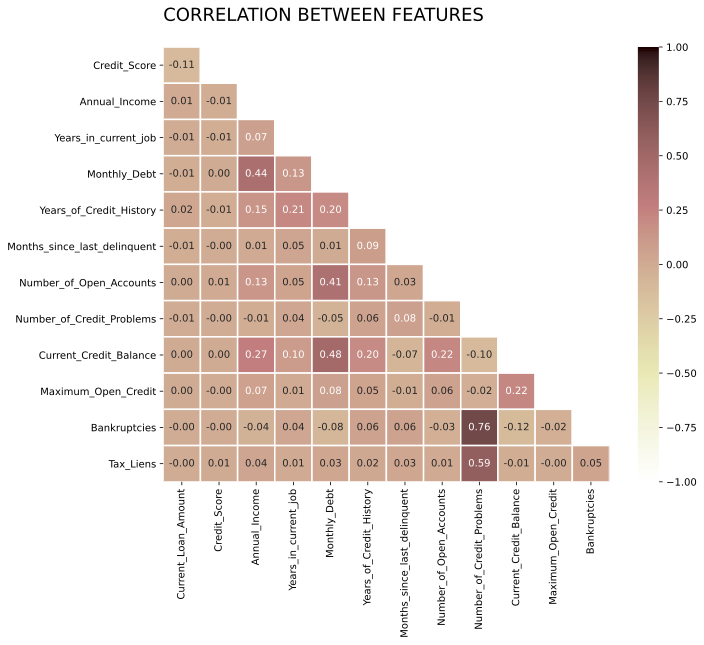

In [76]:
plt.figure(figsize=(10,8))

# corr
data_corr = df_train.corr()
# data_corr = bank_lone_train.corr()

# mask
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = data_corr.iloc[1:,:-1].copy()

sns.heatmap(corr, cmap = 'pink_r', annot = True, vmin= -1, vmax= 1, linewidths=1.5, fmt='.2f', mask=mask);
plt.title('CORRELATION BETWEEN FEATURES\n', loc='left', fontsize=18);
# plt.savefig('plot13.png', dpi = 300, bbox_inches = 'tight');

## Visualize data
___

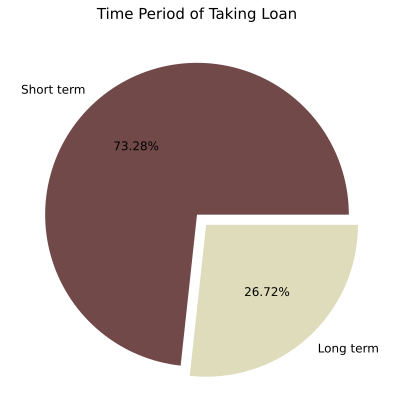

In [77]:
c = ['#724949','#cfa691', '#120f0f', '#a06868']
plt.figure(figsize=(7,7))
plt.pie(x = bank_lone_train['Term_Short Term'].value_counts(),
        labels=['Short term','Long term'],autopct='%.2f%%',
        textprops={'fontsize': 12},explode=[0,0.09], colors = ['#724949','#DEDCBB'])
plt.title('Time Period of Taking Loan',fontdict={'fontsize':15});

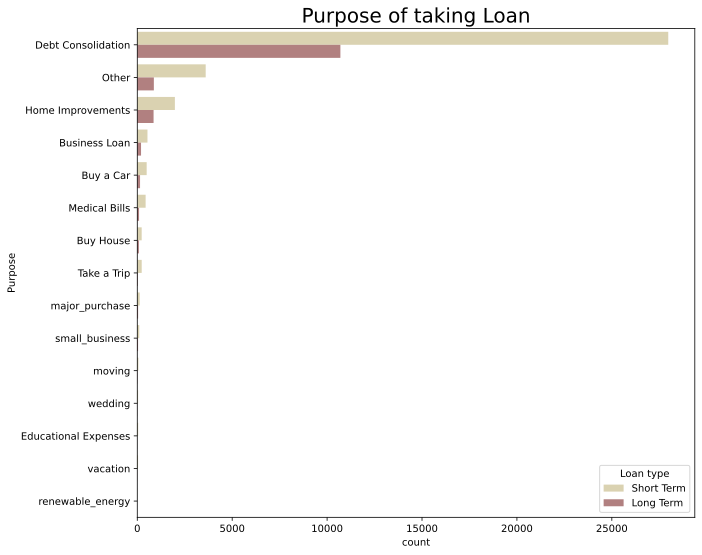

In [78]:
plt.figure(figsize=(10,9))
sns.countplot(y='Purpose' , data=df_train, order = df_train['Purpose'].value_counts().index,
              hue='Term', palette = 'pink_r')
plt.title('Purpose of taking Loan' , fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="lower right");

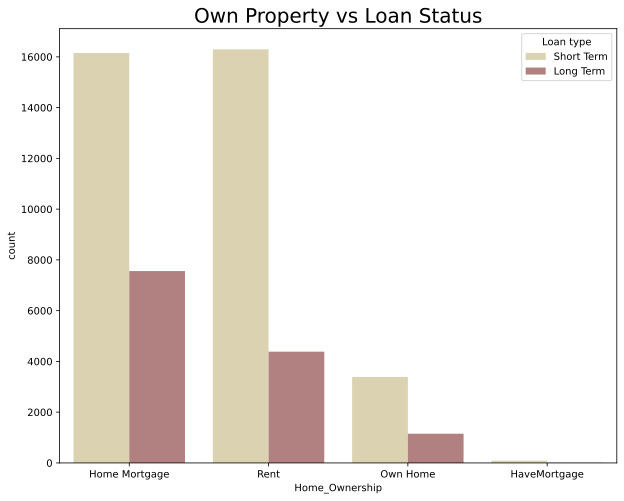

In [79]:
plt.figure(figsize=(10,8))
sns.countplot(x='Home_Ownership',data=df_train ,order = df_train['Home_Ownership'].value_counts().index
              ,hue='Term',  palette = 'pink_r')
plt.title('Own Property vs Loan Status',fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="upper right", labels=["Short Term","Long Term"]);

## KNN Model
---

In [80]:
X_train = bank_lone_train.drop(['Term_Short Term'], axis = 1)
y_train = bank_lone_train['Term_Short Term']
X_val = bank_lone_val.drop(['Term_Short Term'], axis = 1)
y_val = bank_lone_val['Term_Short Term']

In [81]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(49022, 32)
(49022,)
(13722, 32)
(13722,)


In [82]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('The accuracy for training : ',knn.score(X_train,y_train))
print('The accuracy for validation: ',knn.score(X_val,y_val))
print('f1_score for train: ',f1_score(knn.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(knn.predict(X_val), y_val))

The accuracy for training :  0.8151646199665457
The accuracy for validation:  0.7390322110479522
f1_score for train:  0.8791657220584902
f1_score for validation:  0.8265943537843204
